In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

In [1]:
# Install necessary libraries (optional in Colab, usually already installed)
!pip install pandas numpy matplotlib seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)

# Display first 5 rows
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

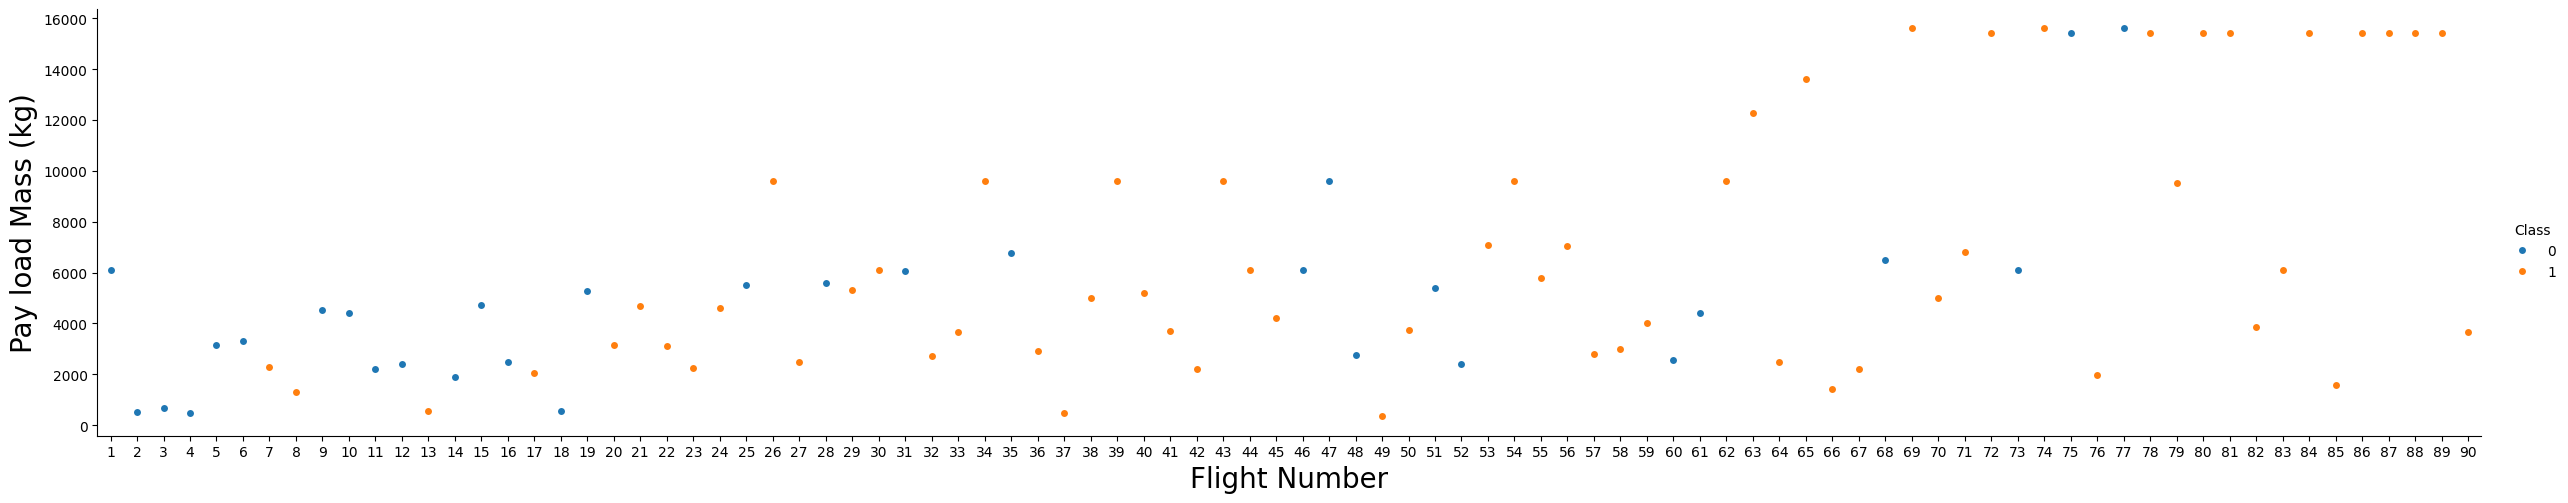

In [2]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Visualize the relationship between Flight Number and Launch Site

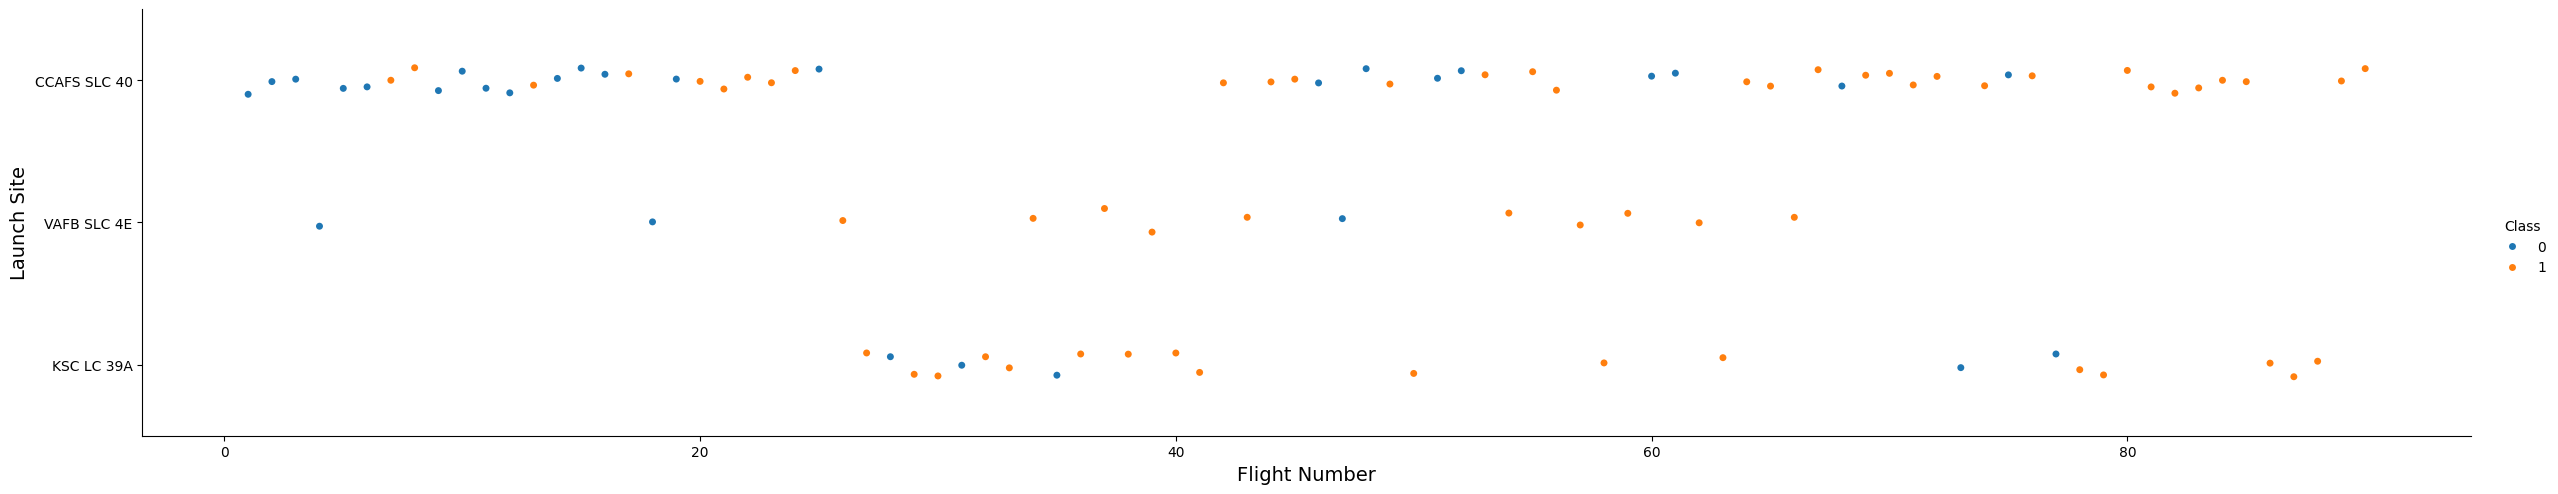

In [3]:
# Create the catplot
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5)

# Customize axis labels
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)

# Show the plot
plt.show()

Visualize the relationship between Payload Mass and Launch Site

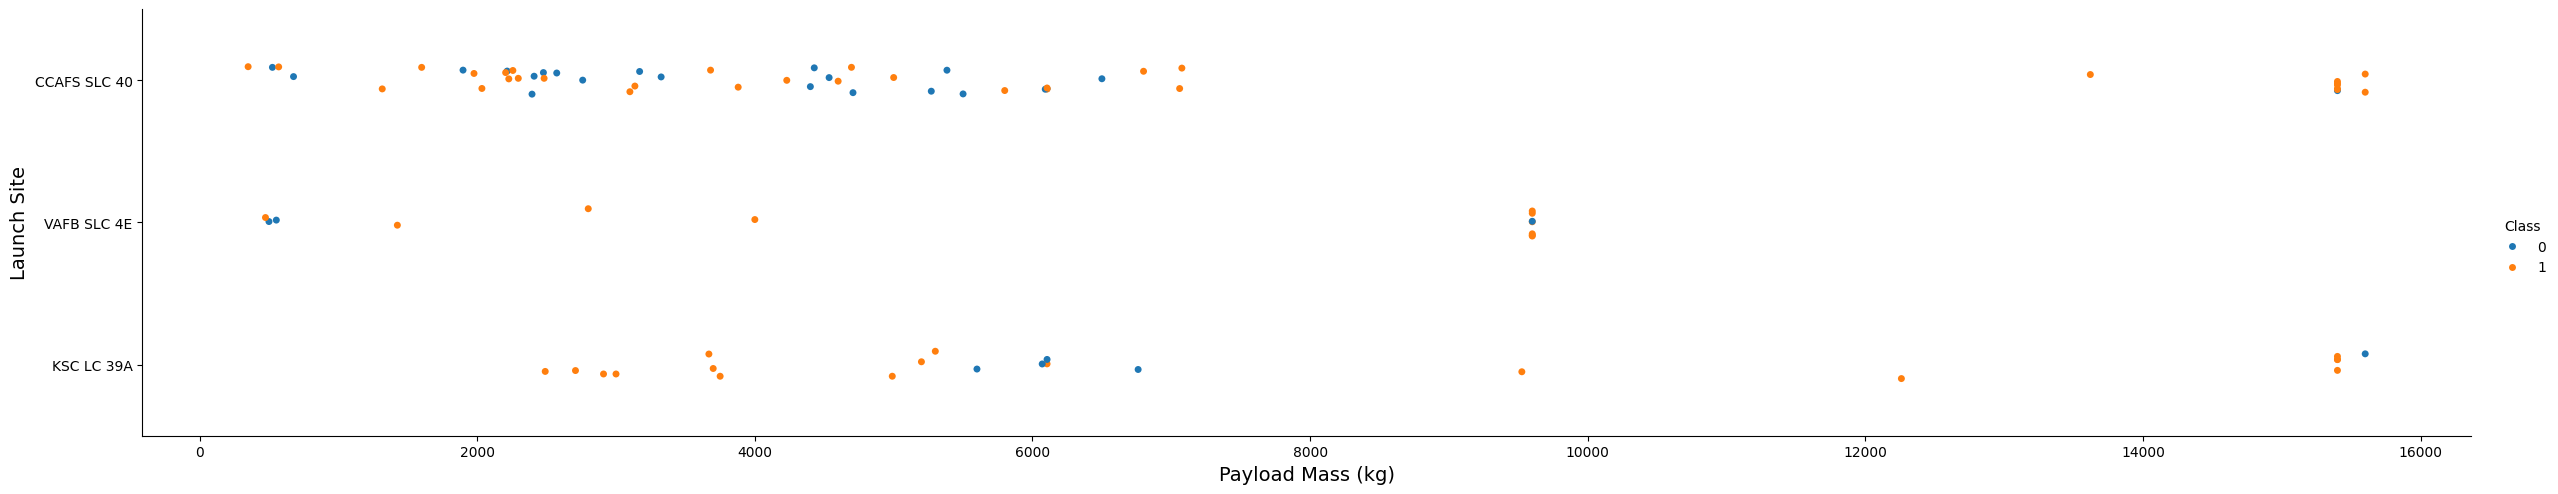

In [4]:
# Create the catplot
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=5)

# Customize axis labels
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)

# Show the plot
plt.show()

Visualize the relationship between success rate of each orbit type¶
Next, we want to visually check if there are any relationship between success rate and orbit type.







Let's create a bar chart for the sucess rate of each orbit

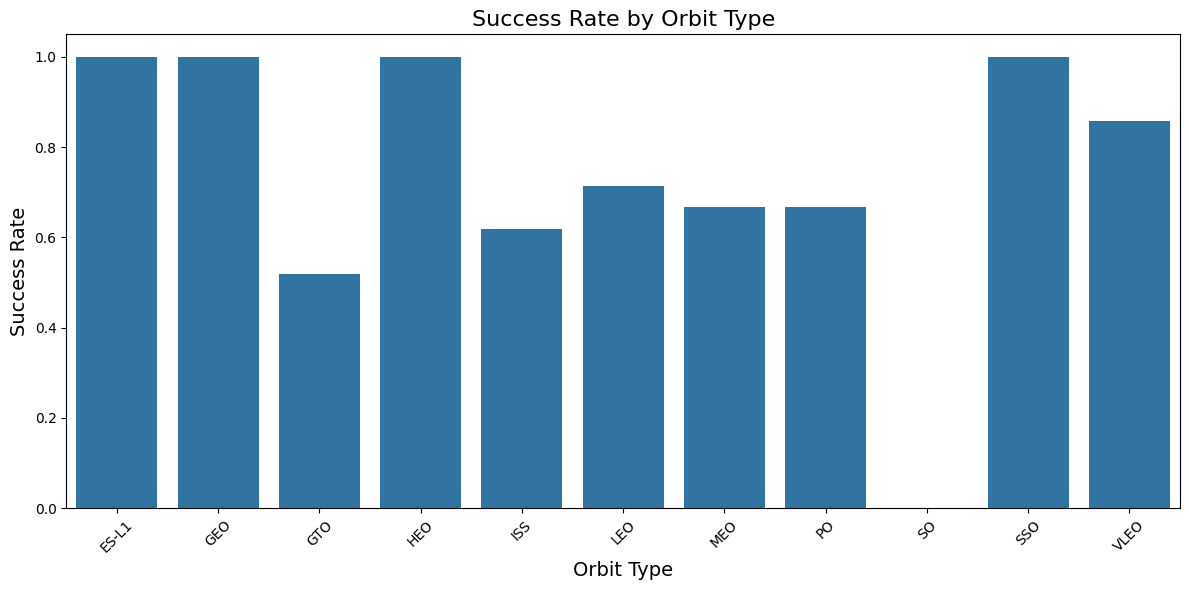

In [5]:
# Group by 'Orbit' and calculate success rate
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate.columns = ['Orbit', 'SuccessRate']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='SuccessRate', data=success_rate)

# Add labels and title
plt.xticks(rotation=45)
plt.ylabel('Success Rate', fontsize=14)
plt.xlabel('Orbit Type', fontsize=14)
plt.title('Success Rate by Orbit Type', fontsize=16)
plt.tight_layout()
plt.show()

 Visualize the relationship between FlightNumber and Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.



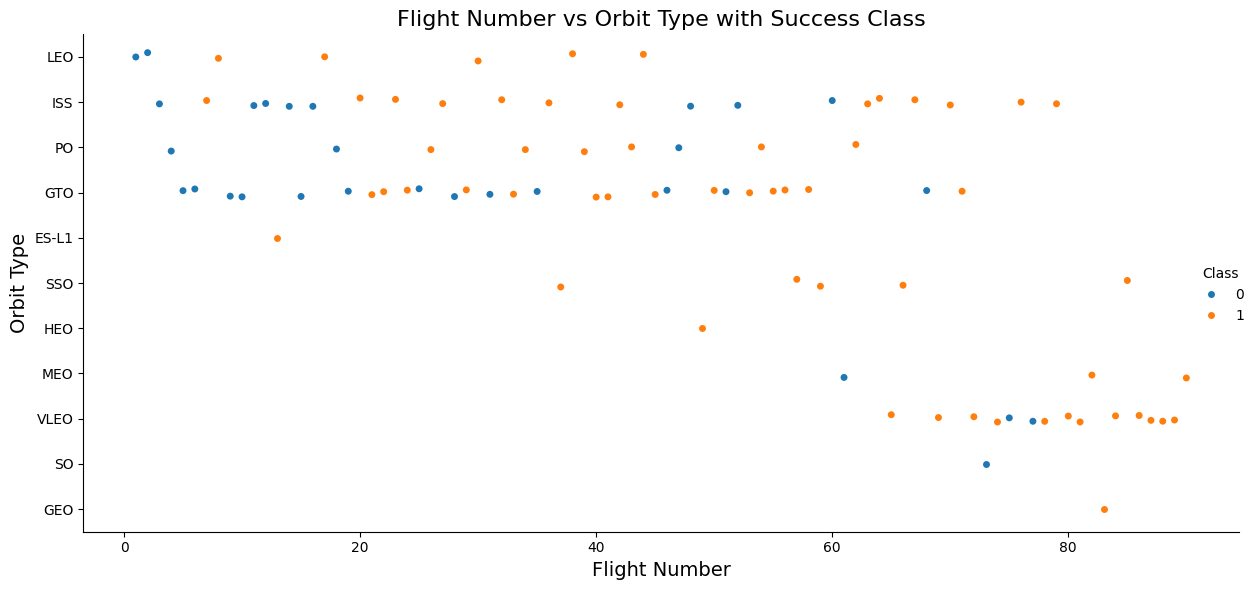

In [6]:
# Create a categorical plot
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df, aspect=2, height=6)

# Customize the plot
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type with Success Class", fontsize=16)
plt.tight_layout()
plt.show()

Visualize the relationship between Payload Mass and Orbit type¶
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

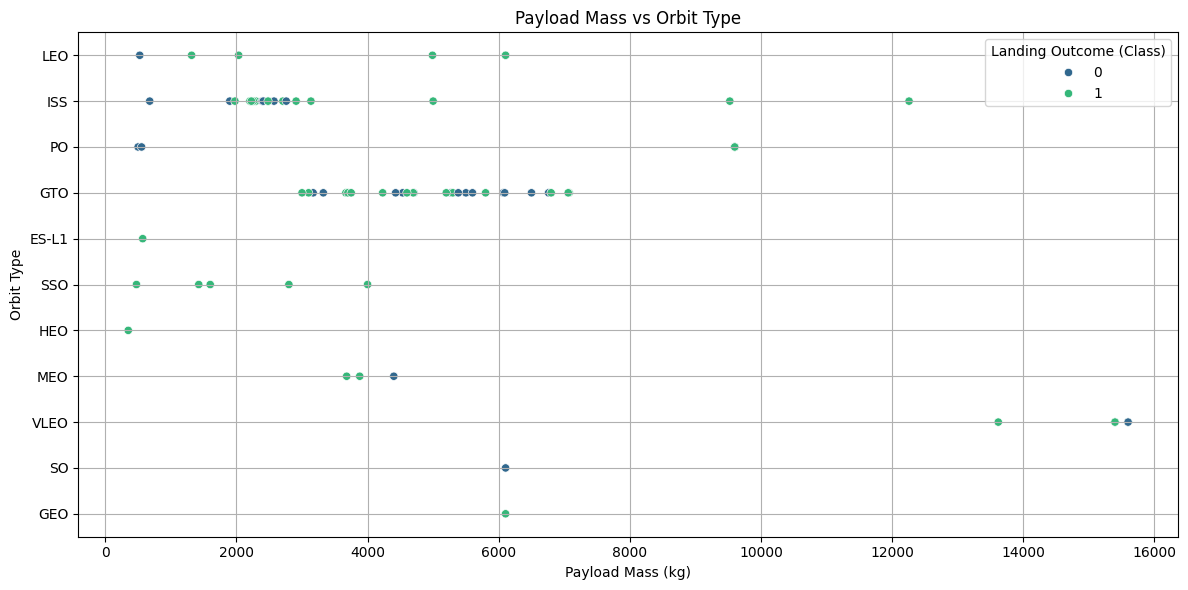

In [9]:
# Plot: Payload Mass vs Orbit Type
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='viridis')

plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.legend(title='Landing Outcome (Class)')
plt.grid(True)
plt.tight_layout()
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

isualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [11]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


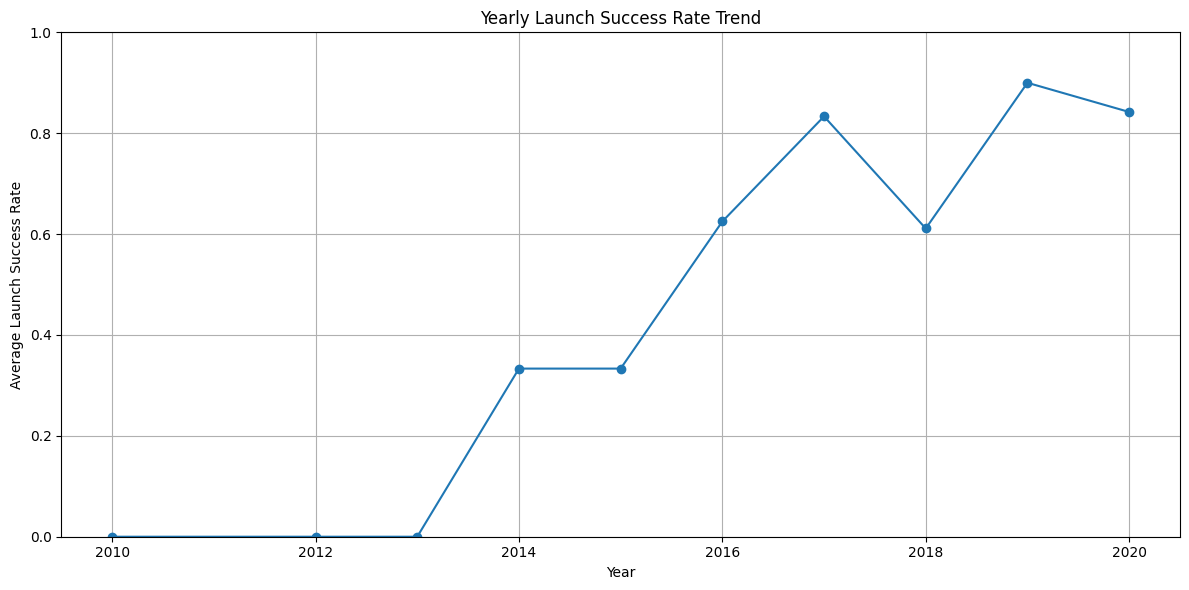

In [12]:
# Step 1: Extract Year from Date
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Step 2 & 3: Group by Year and calculate average success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Step 4: Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_success['Year'], yearly_success['Class'], marker='o', linestyle='-')
plt.title('Yearly Launch Success Rate Trend')
plt.xlabel('Year')
plt.ylabel('Average Launch Success Rate')
plt.ylim(0, 1)  # Since success rate is between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

###you can observe that the sucess rate since 2013 kept increasing till 2020

#Features Engineering

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [14]:
# Select the features dataframe (all columns except the target 'Class' or any you want to exclude)
features = df.drop(columns=['Class', 'Date'])  # Drop 'Class' and 'Date' if not needed as features

# Apply one-hot encoding to specified categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first 5 rows of the resulting dataframe
features_one_hot.head()


,FlightNumber,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,Falcon 9,6104.959412,None None,1,False,False,False,1.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,Falcon 9,525.000000,None None,1,False,False,False,1.0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,Falcon 9,677.000000,None None,1,False,False,False,1.0,0,...,False,False,False,False,False,False,False,False,False,False
3,4,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,0,...,False,False,False,False,False,False,False,False,False,False
4,5,Falcon 9,3170.000000,None None,1,False,False,False,1.0,0,...,False,False,False,False,False,False,False,False,False,False


In [16]:
print(features_one_hot.dtypes[features_one_hot.dtypes == 'object'])


BoosterVersion    object
Outcome           object
dtype: object


In [17]:
# Drop 'Class', 'Date', and 'Outcome' as they are target or not features
features = df.drop(columns=['Class', 'Date', 'Outcome'])

# Include all categorical columns you want to encode
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial', 'BoosterVersion']

# Apply one-hot encoding to categorical columns
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Cast all columns to float64
features_one_hot = features_one_hot.astype('float64')

# Check the result
print(features_one_hot.dtypes)
features_one_hot.head()


FlightNumber               float64
PayloadMass                float64
Flights                    float64
GridFins                   float64
Reused                     float64
                            ...   
Serial_B1058               float64
Serial_B1059               float64
Serial_B1060               float64
Serial_B1062               float64
BoosterVersion_Falcon 9    float64
Length: 84, dtype: object


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,...,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,BoosterVersion_Falcon 9
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,-120.610829,34.632093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,-80.577366,28.561857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
from google.colab import files

# Save the dataframe to CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Download the CSV file
files.download('dataset_part_3.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>